In [1]:
import numpy as np
import pandas as pd
from FTS import fts_util
from PyEMD import EMD
import seaborn as sns
import matplotlib.pyplot as plt
cores = sns.color_palette(n_colors=21)

# Quantitative Evaluation

## Data: Alabama enrollment

### Pre-processing: smooth series

In [2]:
# read tsfcm_labels
ala = pd.read_csv('../../data/csv/Enrollments.csv', sep=';', index_col=[0], parse_dates=[0])
col = ala.keys().to_list()[0]

# decomposition: apply EMD to get IMFs
emd = EMD()
imfs = emd.emd(ala[col].values)

#fts_util.plot_imfs(ala[col].values, imfs, fs=(20,15))

''' Select MFIs without trending and noise behavior '''

df_fts = pd.DataFrame(ala[col].copy())
df_fts[col] = ala

col_imf = 'residue'
df_fts[col_imf] = imfs[1]+imfs[2]

### Run My Appoach + Chen Model

/home/marcos/envts/lib/python3.6/site-packages/fcmeans/fcm.py:51: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/home/marcos/envts/lib/python3.6/site-packages/fcmeans/fcm.py:51: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_


MAPE......: 2.39
------------------------------
MAE.......: 387.66
------------------------------
MSE.......: 236878.22
------------------------------
RMSE......: 486.7
------------------------------
DTW.......: 132.3945805264542


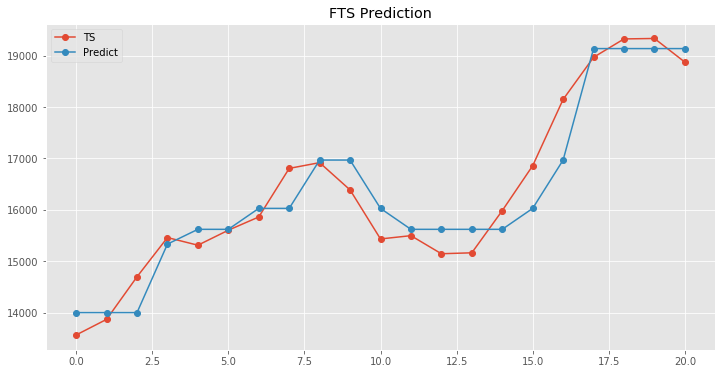

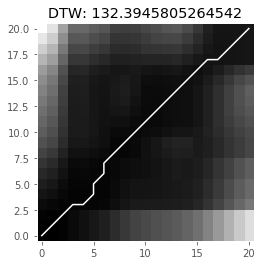

(2.39, 387.66, 236878.22, 486.7)

In [3]:
from FTS.Models.MV_Chen import STFMV_Convencional
model = STFMV_Convencional()
model.fit(X=df_fts[[col,col_imf]].values, k=7)
model.predict()

### Run My Appoach +  Lee Model

/home/marcos/envts/lib/python3.6/site-packages/fcmeans/fcm.py:51: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/home/marcos/envts/lib/python3.6/site-packages/fcmeans/fcm.py:51: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_


MAPE......: 2.41
------------------------------
MAE.......: 389.92
------------------------------
MSE.......: 219032.33
------------------------------
RMSE......: 468.01
------------------------------
DTW.......: 154.36156226485022


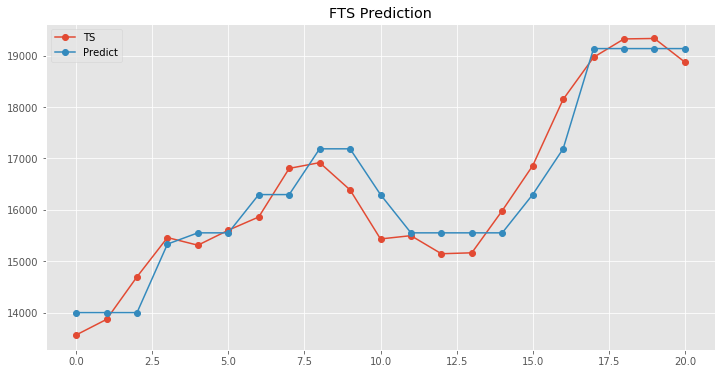

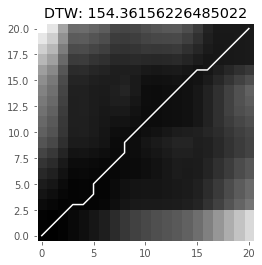

(2.41, 389.92, 219032.33, 468.01)

In [4]:
from FTS.Models.MV_Lee import STFMV_Convencional
model = STFMV_Convencional()
model.fit(X=df_fts[[col,col_imf]].values, k=7)
model.predict()

## Data: TAIEX 1992 stock index

In [5]:
taiex = pd.read_csv('../../data/csv/stock/TAIEX_1992.csv', index_col=[0])
taiex.head()

,values
Time,
01/04/1992,4612.97
01/06/1992,4692.17
01/07/1992,4718.81
01/08/1992,4772.61
01/09/1992,4803.51


### Pre-processing: smooth series

shape imf:  (5, 281)


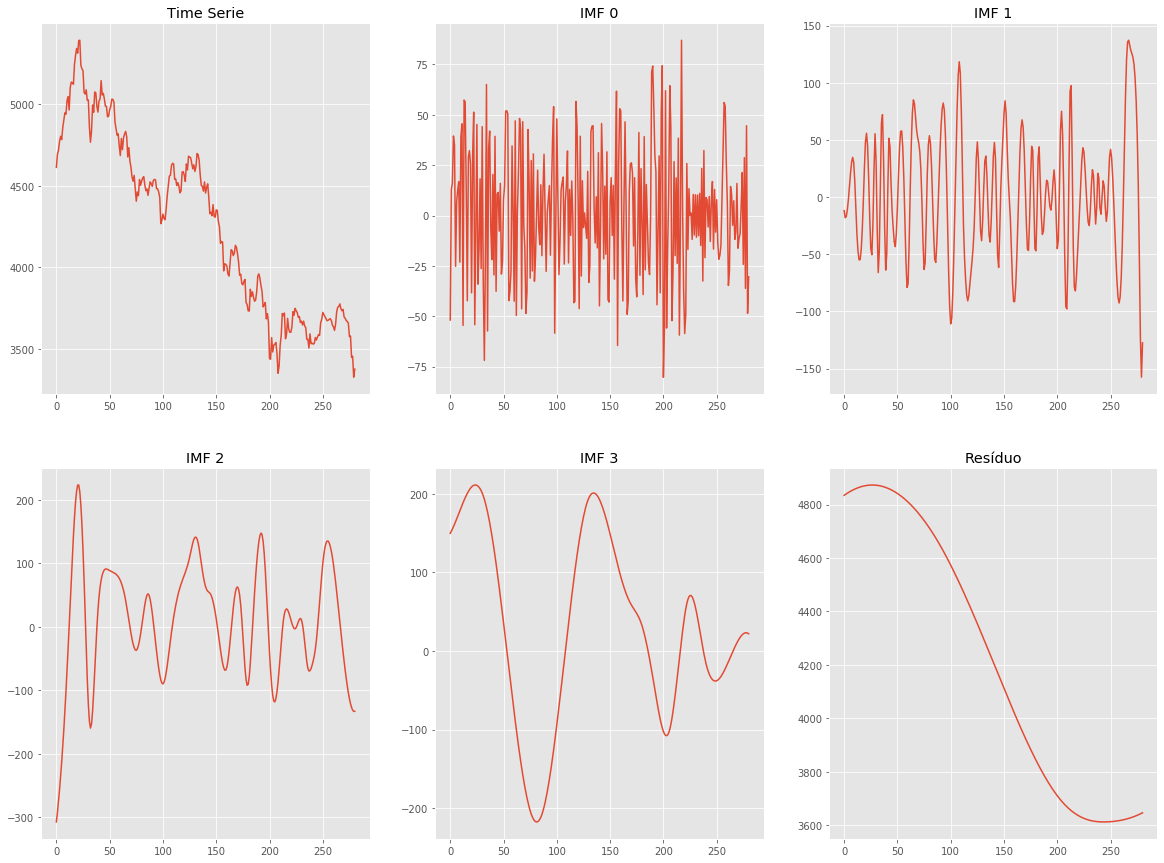

In [6]:
col = taiex.keys().to_list()[0]

#file_results = 'Resultados/QE.csv'

# apply EMD to get IMFs
emd = EMD()
imfs = emd.emd(taiex[col].values)

fts_util.plot_imfs(taiex[col].values, imfs, fs=(20,15))

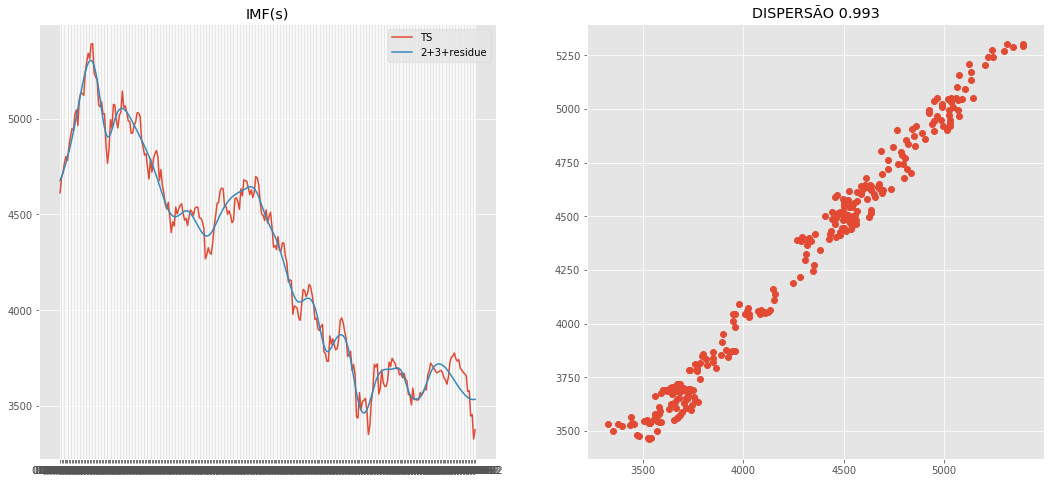

In [7]:
''' Select MFIs without trending and noise behavior '''

df_fts = pd.DataFrame(taiex[col].copy())
df_fts[col] = taiex

# col_imf = '1+2+3+residue'
#df_fts[col_imf] = imfs[1]+imfs[2]+imfs[3]+imfs[4]

col_imf = '2+3+residue'
df_fts[col_imf] = imfs[2]+imfs[3]+imfs[4]

corr = round(np.corrcoef(df_fts[col], df_fts[col_imf])[0,1], 3)

''' PLOT '''
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(121)
ax.plot(df_fts[col], label='TS')
ax.plot(df_fts[col_imf], label=col_imf)
ax.set_title('IMF(s)')
ax.legend()

ax = fig.add_subplot(122)
ax.plot(df_fts[col], df_fts[col_imf], 'o')
ax.set_title('DISPERSÃO {}'.format(corr))

plt.show()

In [8]:
df_fts[col].shape, df_fts[col_imf].shape

((281,), (281,))

### Run My Appoach + Chen Model

/home/marcos/envts/lib/python3.6/site-packages/fcmeans/fcm.py:51: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/home/marcos/envts/lib/python3.6/site-packages/fcmeans/fcm.py:51: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_


MAPE......: 2.27
------------------------------
MAE.......: 95.52
------------------------------
MSE.......: 13610.31
------------------------------
RMSE......: 116.66
------------------------------
DTW.......: 41.82573241372354


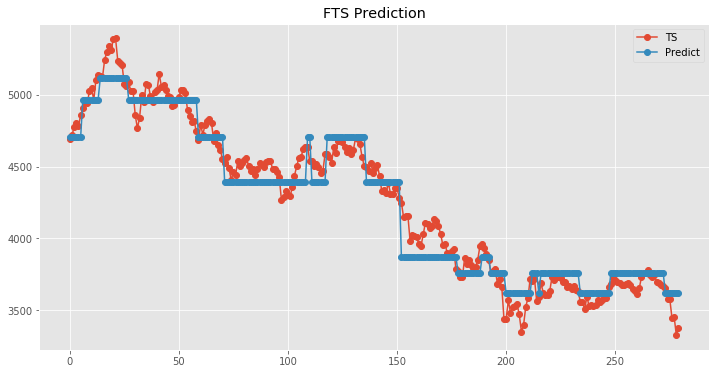

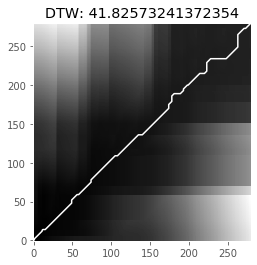

(2.27, 95.52, 13610.31, 116.66)

In [9]:
from FTS.Models.MV_Chen import STFMV_Convencional
model = STFMV_Convencional()
model.fit(X=df_fts[[col,col_imf]].values, k=7)
model.predict()

### Run My Appoach + Lee Model 

/home/marcos/envts/lib/python3.6/site-packages/fcmeans/fcm.py:51: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/home/marcos/envts/lib/python3.6/site-packages/fcmeans/fcm.py:51: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_


MAPE......: 1.68
------------------------------
MAE.......: 71.5
------------------------------
MSE.......: 8379.14
------------------------------
RMSE......: 91.54
------------------------------
DTW.......: 32.63150250408246


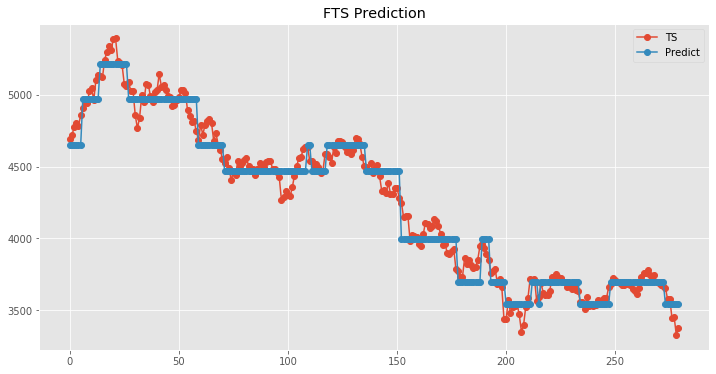

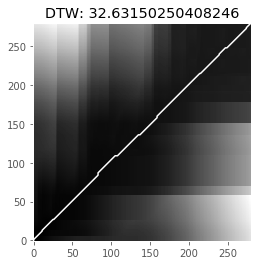

(1.68, 71.5, 8379.14, 91.54)

In [10]:
from FTS.Models.MV_Lee import STFMV_Convencional
model = STFMV_Convencional()
model.fit(X=df_fts[[col,col_imf]].values, k=7)
model.predict()

## Data: DAX Stock Index

shape imf:  (5, 182)


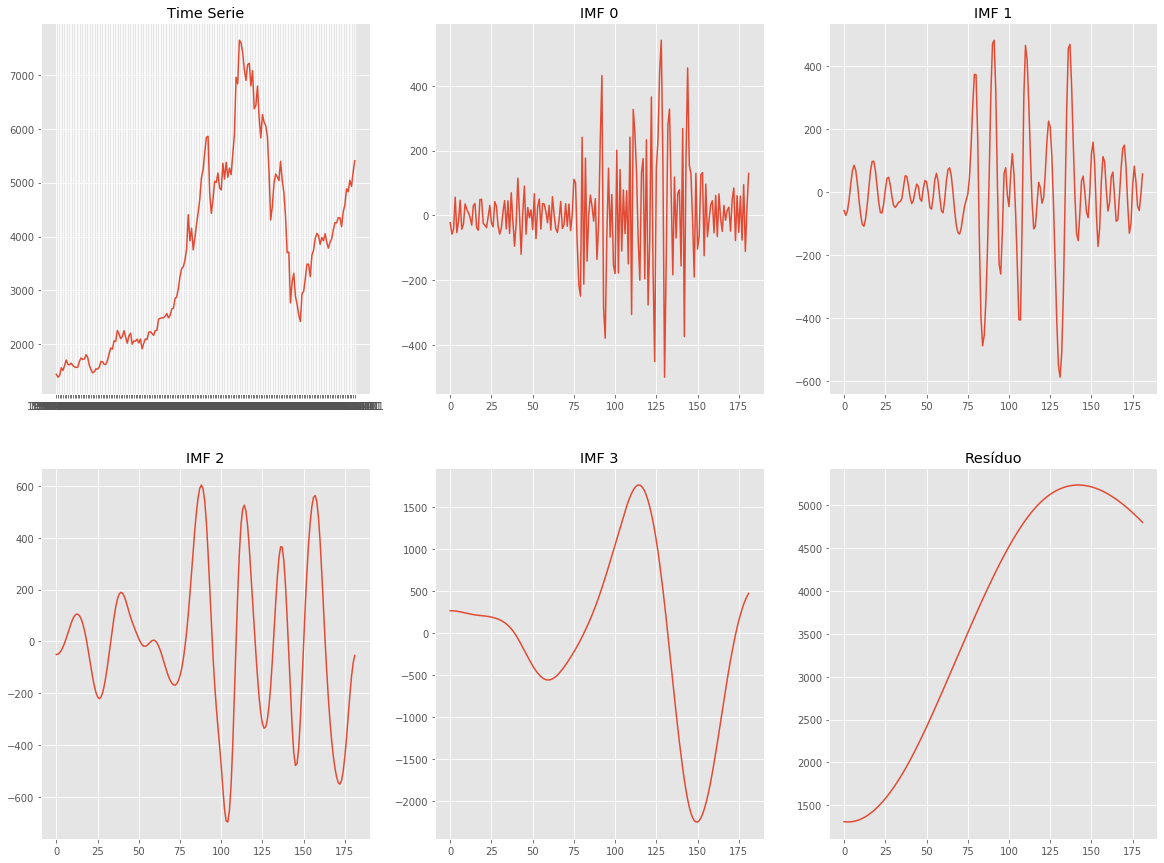

In [42]:
ts = pd.read_csv('../../data/csv/stock/GDAXI.csv', index_col=[0])
ts.head()

col = 'Close' #taiex.keys().to_list()[0]

# apply EMD to get IMFs
emd = EMD()
imfs = emd.emd(ts[col].values)

fts_util.plot_imfs(ts[col], imfs, fs=(20,15))

### Pre-processing: smooth series

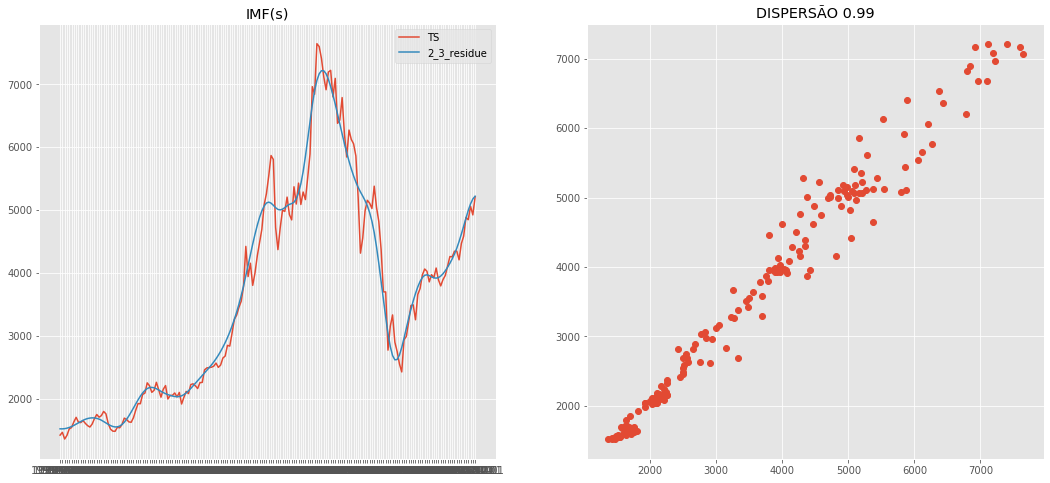

In [44]:
''' Select MFIs without trending and noise behavior '''

df_fts = pd.DataFrame(ts[col].copy())
df_fts[col] = ts
df_fts.head()


col_imf = '2_3_residue'
df_fts[col_imf] = imfs[2]+imfs[3]+imfs[4]

corr = round(np.corrcoef(ts[col], df_fts[col_imf])[0,1], 3)

''' PLOT '''
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(121)
ax.plot(df_fts[col], label='TS')
ax.plot(df_fts[col_imf], label=col_imf)
ax.set_title('IMF(s)')
ax.legend()

ax = fig.add_subplot(122)
ax.plot(df_fts[col], df_fts[col_imf], 'o')
ax.set_title('DISPERSÃO {}'.format(corr))

plt.show()

### Run My Appoach + Chen Model

/home/marcos/envts/lib/python3.6/site-packages/fcmeans/fcm.py:51: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/home/marcos/envts/lib/python3.6/site-packages/fcmeans/fcm.py:51: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_


MAPE......: 11.61
------------------------------
MAE.......: 333.44
------------------------------
MSE.......: 177745.19
------------------------------
RMSE......: 421.6
------------------------------
DTW.......: 130.922905732231


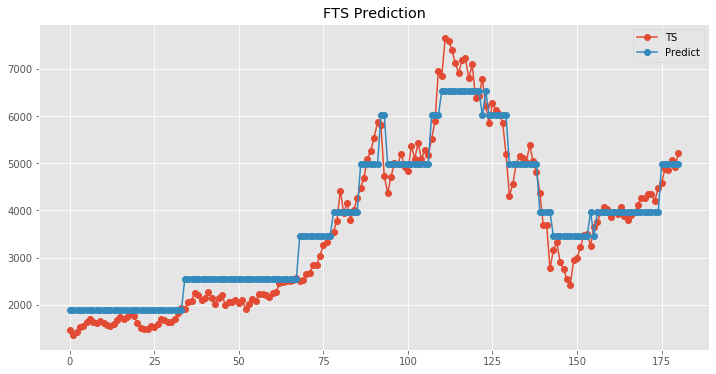

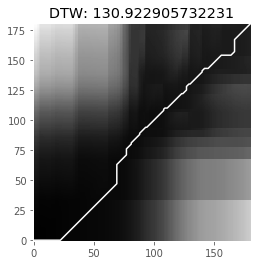

(11.61, 333.44, 177745.19, 421.6)

In [45]:
from FTS.Models.MV_Chen import STFMV_Convencional
model = STFMV_Convencional()
model.fit(X=df_fts[[col, col_imf]].values, k=7)
model.predict()

### Run My Appoach + Lee Model

/home/marcos/envts/lib/python3.6/site-packages/fcmeans/fcm.py:51: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/home/marcos/envts/lib/python3.6/site-packages/fcmeans/fcm.py:51: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_


MAPE......: 6.76
------------------------------
MAE.......: 233.28
------------------------------
MSE.......: 107032.86
------------------------------
RMSE......: 327.16
------------------------------
DTW.......: 100.22345394945712


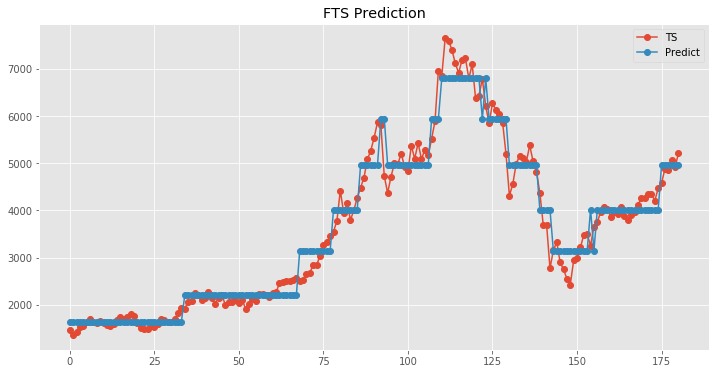

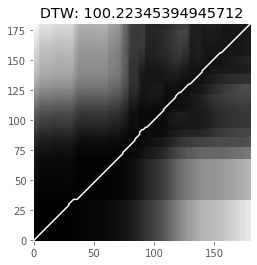

(6.76, 233.28, 107032.86, 327.16)

In [46]:
from FTS.Models.MV_Lee import STFMV_Convencional
model = STFMV_Convencional()
model.fit(X=df_fts[[col,col_imf]].values, k=7)
model.predict()